In [12]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '50ed1e3e-374a-4588-83ec-ab5e9d847b00',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL 

{'status': {'timestamp': '2022-12-07T06:48:20.922Z', 'error_code': 0, 'error_message': None, 'elapsed': 1431, 'credit_count': 1, 'notice': None, 'total_count': 8969}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9865, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [13]:
type(data)

dict

In [30]:
import pandas as pd

#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [15]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp']=pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9865,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.922653e+07,1.922653e+07,NaN,1,NaN,NaN,None,2022-12-07T06:46:00.000Z,16978.118284,1.949359e+10,-0.6167,-0.211122,-0.210806,0.672697,-18.742310,-12.940001,-11.915448,3.264303e+11,38.3471,3.565405e+11,None,2022-12-07T06:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-07 06:48:34.012510
1,1027,Ethereum,ETH,ethereum,6261,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,None,2022-12-07T06:46:00.000Z,1256.891901,5.177608e+09,-6.8948,-0.358106,-0.390643,-0.940519,-20.660601,-5.495456,-22.809199,1.538107e+11,18.0686,1.538107e+11,None,2022-12-07T06:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-07 06:48:34.012510
2,825,Tether,USDT,tether,44226,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.568522e+10,7.314177e+10,NaN,3,NaN,NaN,None,2022-12-07T06:45:00.000Z,1.000065,2.499567e+10,-5.0445,0.001683,-0.004227,0.024357,-0.000546,-0.010890,-0.000863,6.568950e+10,7.7167,7.314653e+10,None,2022-12-07T06:45:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-12-07 06:48:34.012510
3,1839,BNB,BNB,bnb,1149,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.599693e+08,1.599800e+08,NaN,4,NaN,NaN,None,2022-12-07T06:46:00.000Z,288.152757,6.270196e+08,-1.0244,-0.211244,-0.421655,-3.728197,-14.668401,2.351734,3.451544,4.609559e+10,5.4150,5.763055e+10,None,2022-12-07T06:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-07 06:48:34.012510
4,3408,USD Coin,USDC,usd-coin,8729,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.300547e+10,4.300547e+10,NaN,5,NaN,NaN,None,2022-12-07T06:45:00.000Z,0.999842,2.283511e+09,6.6759,-0.018496,-0.018866,-0.024373,-0.024346,-0.016626,-0.014121,4.299868e+10,5.0482,4.299868e+10,None,2022-12-07T06:45:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-12-07 06:48:34.012510
5,4687,Binance USD,BUSD,binance-usd,5685,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,2.205613e+10,2.205613e+10,NaN,6,NaN,NaN,None,2022-12-07T06:45:00.000Z,0.999484,5.469720e+09,3.0336,-0.078614,-0.062147,-0.093152,-0.050271,-0.096202,-0.062538,2.204475e+10,2.5897,2.204475e+10,None,2022-12-07T06:45:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-12-07 06:48:34.012510
6,52,XRP,XRP,xrp,854,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.026045e+10,9.998920e+10,NaN,7,NaN,NaN,None,2022-12-07T06:46:00.000Z,0.385914,7.817551e+08,-12.9290,-0.489620,0.278744,-4.007067,-17.447267,-25.742835,15.911578,1.939619e+10,2.2785,3.859136e+10,None,2022-12-07T06:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-07 06:48:34.012510
7,74,Dogecoin,DOGE,dogecoin,608,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.326708e+11,1.326708e+11,NaN,8,NaN,NaN,None,2022-12-07T06:46:00.000Z,0.099953,5.137533e+08,-49.5631,-0.545432,-1.091663,-5.684444,-14.829782,60.498793,64.300481,1.326084e+10,1.5578,1.326084e+10,None,2022-12-07T06:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-07 06:48:34.012510
8,2010,Cardano,ADA,cardano,604,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.445900e+10,3.523064e+10

In [53]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '50ed1e3e-374a-4588-83ec-ab5e9d847b00',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    #NOTE:
    # I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
    # Into the Anaconda Prompt to change this to allow to pull data
    
     # Use this if you just want to keep it in a dataframe
    #df2 = pd.json_normalize(data['data'])
    #df2['timestamp'] = pd.to_datetime('now')
    #df = df.append(df2)


    # Use this if you want to create a csv and append data to it
    df2 = pd.json_normalize(data['data'])
    df2['timestamp']=pd.to_datetime('now')
    df = df.append(df2)
    
    #if not os.path.isfile(r'C:\Users\anees\OneDrive\Desktop\ANEES\PORTFOLIO PROJECTS\API\API.csv'):
        #df.to_csv(r'C:\Users\anees\OneDrive\Desktop\ANEES\PORTFOLIO PROJECTS\API\API.csv', header='column_names')
    #else:
        #df.to_csv(r'C:\Users\anees\OneDrive\Desktop\ANEES\PORTFOLIO PROJECTS\API\API.csv', mode='a', header=False)
    # If that didn't work try using the local host URL 
    
    

In [54]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [55]:
df72 = pd.read_csv(r'C:\Users\anees\OneDrive\Desktop\ANEES\PORTFOLIO PROJECTS\API\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9865,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19226531.00000,19226531.00000,NaN,1,NaN,NaN,NaN,2022-12-07T07:13:00.000Z,16938.53521,19720244491.22922,0.98950,-0.34031,-0.40649,0.37604,-18.56996,-13.19273,-11.90980,325669272303.86932,38.40830,355709239403.67999,NaN,2022-12-07T07:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-07 07:14:10.474607
1,1,1027,Ethereum,ETH,ethereum,6261,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,NaN,2022-12-07T07:13:00.000Z,1248.36253,5285438204.78654,-4.44260,-0.92672,-1.03788,-1.66536,-20.54267,-6.19984,-23.23726,152766949592.36511,18.01430,152766949592.37000,NaN,2022-12-07T07:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-07 07:14:10.474607
2,2,825,Tether,USDT,tether,44229,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,65685215611.09682,73141766321.23428,NaN,3,NaN,NaN,NaN,2022-12-07T07:12:00.000Z,1.00005,25318304397.45131,-3.49110,-0.00132,-0.00592,0.01972,-0.00345,-0.00910,-0.00259,65688243693.45742,7.74600,73145138149.89000,NaN,2022-12-07T07:12:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-12-07 07:14:10.474607
3,3,1839,BNB,BNB,bnb,1149,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",200000000.00000,159969276.02420,159979963.59043,NaN,4,NaN,NaN,NaN,2022-12-07T07:12:00.000Z,287.25204,629668605.94450,-0.68040,-0.40698,-0.80891,-4.13295,-14.12859,2.03427,2.99483,45951500271.75426,5.41940,57450407245.46000,NaN,2022-12-07T07:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-07 07:14:10.474607
4,4,3408,USD Coin,USDC,usd-coin,8730,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,43005465266.46496,43005465266.46496,NaN,5,NaN,NaN,NaN,2022-12-07T07:12:00.000Z,0.99976,2292361645.53652,6.14820,-0.01358,-0.02943,-0.03345,-0.01586,-0.02430,-0.02238,42994930279.95274,5.07070,42994930279.95000,NaN,2022-12-07T07:12:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-12-07 07:14:10.474607
5,5,4687,Binance USD,BUSD,binance-usd,5685,2019-09-20T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'bin...",NaN,22056131821.62442,22056131821.62442,NaN,6,NaN,NaN,NaN,2022-12-07T07:12:00.000Z,0.99969,5549851981.37563,4.86720,-0.04073,-0.01330,-0.05558,0.00151,-0.02000,-0.04352,22049275090.28461,2.60010,22049275090.28000,NaN,2022-12-07T07:12:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-12-07 07:14:10.474607
6,6,52,XRP,XRP,xrp,854,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,50260446248.00000,99989199669.00000,NaN,7,NaN,NaN,NaN,2022-12-07T07:13:00.000Z,0.38503,788931790.74677,-11.33680,-0.73342,0.46179,-4.39742,-17.70869,-26.16815,16.03271,19351602067.99599,2.28190,38502646738.37000,NaN,2022-12-07T07:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-07 07:14:10.474607
7,7,74,Dogecoin,DOGE,dogecoin,608,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,132670764299.89407,132670764299.89407,NaN,8,NaN,NaN,NaN,2022-12-07T07:13:00.000Z,0.09840,534852825.59085,-47.25800,-1.94802,-2.54277,-7.18918,-15.30718,57.99608,61.93681,13054321411.40402,1.53940,13054321411.40000,NaN,2022-12-07T07:13:00.000Z,NaN,NaN,NaN,NaN,N

In [57]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9865,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19226531.00000,19226531.00000,NaN,1,NaN,NaN,None,2022-12-07T07:14:00.000Z,16903.34343,19747444898.57104,1.11080,-0.54361,-0.61953,0.13221,-18.75720,-13.35821,-12.08236,324992656425.67950,38.32850,354970211991.91998,None,2022-12-07T07:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-07 07:16:12.646339
1,1027,Ethereum,ETH,ethereum,6261,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,None,2022-12-07T07:14:00.000Z,1243.49757,5300297449.75443,-4.18350,-1.28492,-1.43936,-2.07287,-20.88131,-6.53489,-23.51353,152171604998.91455,17.94410,152171604998.91000,None,2022-12-07T07:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-07 07:16:12.646339
2,825,Tether,USDT,tether,44229,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,65685215611.09682,73141766321.23428,NaN,3,NaN,NaN,None,2022-12-07T07:14:00.000Z,1.00007,25367243220.18393,-3.28520,0.00060,-0.00269,0.02240,-0.00299,-0.01017,0.00334,65689965976.56287,7.74620,73147055945.66000,None,2022-12-07T07:14:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-12-07 07:16:12.646339
3,1839,BNB,BNB,bnb,1149,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,159969276.02420,159979963.59043,NaN,4,NaN,NaN,None,2022-12-07T07:14:00.000Z,286.98405,630537038.71768,-0.52590,-0.49433,-0.91293,-4.25357,-14.16522,1.96553,3.04795,45908631029.81531,5.41430,57396810401.11000,None,2022-12-07T07:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-07 07:16:12.646339
4,3408,USD Coin,USDC,usd-coin,8730,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,43005465266.46496,43005465266.46496,NaN,5,NaN,NaN,None,2022-12-07T07:14:00.000Z,0.99950,2302242414.70491,7.19230,-0.03958,-0.05894,-0.05956,-0.05533,-0.04686,-0.03549,42983861588.49572,5.06940,42983861588.50000,None,2022-12-07T07:14:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-12-07 07:16:12.646339
5,4687,Binance USD,BUSD,binance-usd,5685,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,22056131821.62442,22056131821.62442,NaN,6,NaN,NaN,None,2022-12-07T07:14:00.000Z,0.99998,5556486800.48400,5.01430,0.00090,-0.00533,-0.08066,0.00048,0.02750,-0.00024,22055741470.28569,2.60080,22055741470.29000,None,2022-12-07T07:14:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-12-07 07:16:12.646339
6,52,XRP,XRP,xrp,854,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,50260446248.00000,99989199669.00000,NaN,7,NaN,NaN,None,2022-12-07T07:14:00.000Z,0.38499,789325701.38918,-11.20150,-0.74212,0.43889,-4.41347,-17.73214,-26.17028,16.04272,19349614336.78350,2.28170,38498691876.52000,None,2022-12-07T07:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-07 07:16:12.646339
7,74,Dogecoin,DOGE,dogecoin,608,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,132670764299.89409,132670764299.89409,NaN,8,NaN,NaN,None,2022-12-07T07:14:00.000Z,0.09810,538833159.82631,-46.86260,-2.23003,-2.84198,-7.55055,-15.57833,57.54253,61.49447,13015527274.60826,1.53480,13015527274.61000,None,2022-12-07T07:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-07 0

In [56]:
#I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [58]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-1.01265,-1.16548,-0.47951,-18.94252,-13.88005,-12.44039
Ethereum,-1.95186,-2.26344,-3.03663,-21.25955,-7.37627,-23.68407
Tether,-0.00034,-0.00554,0.02094,-0.00321,-0.00971,0.00219
BNB,-1.32439,-1.84711,-5.33819,-14.39916,1.13639,2.54933
USD Coin,-0.00831,-0.02349,-0.03636,-0.01617,-0.02523,-0.02992
Binance USD,0.01396,-0.00165,-0.04946,0.00053,0.02587,-0.01965
XRP,-1.88053,-0.88075,-6.13235,-18.83915,-27.18495,14.29965
Dogecoin,-3.85902,-4.76876,-9.42575,-16.57499,54.19624,58.58446
Cardano,-1.98898,-2.63440,-1.58574,-22.87141,-27.33101,-34.25720


In [59]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -1.01265
             quote.USD.percent_change_24h    -1.16548
             quote.USD.percent_change_7d     -0.47951
             quote.USD.percent_change_30d   -18.94252
             quote.USD.percent_change_60d   -13.88005
             quote.USD.percent_change_90d   -12.44039
Ethereum     quote.USD.percent_change_1h     -1.95186
             quote.USD.percent_change_24h    -2.26344
             quote.USD.percent_change_7d     -3.03663
             quote.USD.percent_change_30d   -21.25955
             quote.USD.percent_change_60d    -7.37627
             quote.USD.percent_change_90d   -23.68407
Tether       quote.USD.percent_change_1h     -0.00034
             quote.USD.percent_change_24h    -0.00554
             quote.USD.percent_change_7d      0.02094
             quote.USD.percent_change_30d    -0.00321
             quote.USD.percent_change_60d    -0.00971
             quote.USD.percent_change_90

In [60]:

type(df4)

pandas.core.series.Series

In [61]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -1.01265
            quote.USD.percent_change_24h  -1.16548
            quote.USD.percent_change_7d   -0.47951
            quote.USD.percent_change_30d -18.94252
            quote.USD.percent_change_60d -13.88005
            quote.USD.percent_change_90d -12.44039
Ethereum    quote.USD.percent_change_1h   -1.95186
            quote.USD.percent_change_24h  -2.26344
            quote.USD.percent_change_7d   -3.03663
            quote.USD.percent_change_30d -21.25955
            quote.USD.percent_change_60d  -7.37627
            quote.USD.percent_change_90d -23.68407
Tether      quote.USD.percent_change_1h   -0.00034
            quote.USD.percent_change_24h  -0.00554
            quote.USD.percent_change_7d    0.02094
            quote.USD.percent_change_30d  -0.00321
            quote.USD.percent_change_60d  -0.00971
            quote.USD.percent_change_90d   0.00219
BNB         quote.USD.percent_change_1h   -1.32439
            quote.USD.percent_change_24h  -1.84711
            quote.USD.percent_change_7d   -5.33819
            quote.USD.percent_change_30d -14.39916
            quote.USD.percent_change_60d   1.13639
            quote.USD.percent_change_90d   2.54933
USD Coin    quote.USD.percent_change_1h   -0.00831
            quote.USD.percent_change_24h  -0.02349
            quote.USD.percent_change_7d   -0.03636
            quote.USD.percent_change_30d  -0.01617
            quote.USD.percent_change_60d  -0.02523
            quote.USD.percent_change_90d  -0.02992
Binance USD quote.USD.percent_change_1h    0.01396
            quote.USD.percent_change_24h  -0.00165
            quote.USD.percent_change_7d   -0.04946
            quote.USD.percent_change_30d   0.00053
            quote.USD.percent_change_60d   0.02587
            quote.USD.percent_change_90d  -0.01965
XRP         quote.USD.percent_change_1h   -1.88053
            quote.USD.percent_change_24h  -0.88075
            quote.USD.percent_change_7d   -6.13235
            quote.USD.percent_change_30d -18.83915
            quote.USD.percent_change_60d -27.18495
            quote.USD.percent_change_90d  14.29965
Dogecoin    quote.USD.percent_change_1h   -3.85902
            quote.USD.percent_change_24h  -4.76876
            quote.USD.percent_change_7d   -9.42575
            quote.USD.percent_change_30d -16.57499
            quote.USD.percent_change_60d  54.19624
            quote.USD.percent_change_90d  58.58446
Cardano     quote.USD.percent_change_1h   -1.98898
            quote.USD.percent_change_24h  -2.63440
            quote.USD.percent_change_7d   -1.58574
            quote.USD.percent_change_30d -22.87141
            quote.USD.percent_change_60d -27.33101
            quote.USD.percent_change_90d -34.25720
Polygon     quote.USD.percent_change_1h   -2.57971
            quote.USD.percent_change_24h  -3.49537
            quote.USD.percent_change_7d    0.92344
            quote.USD.percent_change_30d -24.96684
            quote.USD.percent_change_60d   6.42016
            quote.USD.percent_change_90d   5.39414
Polkadot    quote.USD.percent_change_1h   -2.80832
            quote.USD.percent_change_24h  -3.59581
            quote.USD.percent_change_7d   -2.29316
            quote.USD.percent_change_30d -21.67006
            quote.USD.percent_change_60d -16.93154
            quote.USD.percent_change_90d -25.84140
Dai         quote.USD.percent_change_1h   -0.05311
            quote.USD.percent_change_24h  -0.10320
            quote.USD.percent_change_7d   -0.14484
            quote.USD.percent_change_30d  -0.06349
            quote.USD.percent_change_60d  -0.11603
            quote.USD.percent_change_90d  -0.12120
Litecoin    quote.USD.percent_change_1h   -3.25303
            quote.USD.percent_change_24h  -4.19629
            quote.USD.percent_change_7d   -1.32216
            quote.USD.percent_change_30d   9.94119
            quote.USD.percent_change_60d  44.42981
            quo

In [62]:
df5.count()

values    90
dtype: int64

In [74]:

index = pd.Index(range(90))
# Set the above DataFrame index object as the index
# using set_index() function
#df6 = df5.set_index(index)
#df6

# If it only has the index and values try doing reset_index like "
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-1.01265
1,Bitcoin,quote.USD.percent_change_24h,-1.16548
2,Bitcoin,quote.USD.percent_change_7d,-0.47951
3,Bitcoin,quote.USD.percent_change_30d,-18.94252
4,Bitcoin,quote.USD.percent_change_60d,-13.88005
5,Bitcoin,quote.USD.percent_change_90d,-12.44039
6,Ethereum,quote.USD.percent_change_1h,-1.95186
7,Ethereum,quote.USD.percent_change_24h,-2.26344
8,Ethereum,quote.USD.percent_change_7d,-3.03663
9,Ethereum,quote.USD.percent_change_30d,-21.25955


In [75]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-1.01265
1,Bitcoin,quote.USD.percent_change_24h,-1.16548
2,Bitcoin,quote.USD.percent_change_7d,-0.47951
3,Bitcoin,quote.USD.percent_change_30d,-18.94252
4,Bitcoin,quote.USD.percent_change_60d,-13.88005
5,Bitcoin,quote.USD.percent_change_90d,-12.44039
6,Ethereum,quote.USD.percent_change_1h,-1.95186
7,Ethereum,quote.USD.percent_change_24h,-2.26344
8,Ethereum,quote.USD.percent_change_7d,-3.03663
9,Ethereum,quote.USD.percent_change_30d,-21.25955


In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-1.01265
1,Bitcoin,24h,-1.16548
2,Bitcoin,7d,-0.47951
3,Bitcoin,30d,-18.94252
4,Bitcoin,60d,-13.88005
5,Bitcoin,90d,-12.44039
6,Ethereum,1h,-1.95186
7,Ethereum,24h,-2.26344
8,Ethereum,7d,-3.03663
9,Ethereum,30d,-21.25955


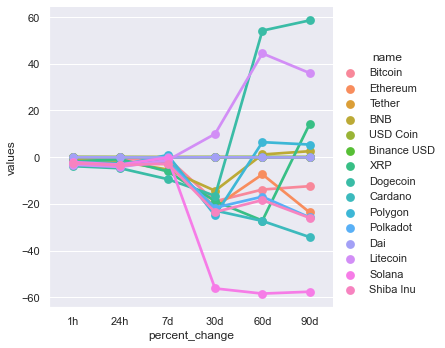

In [78]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [79]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df8.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,16903.34343,2022-12-07 07:16:12.646339
0,Bitcoin,16784.49840,2022-12-07 07:50:59.313706
0,Bitcoin,16784.49840,2022-12-07 07:52:00.428603
0,Bitcoin,16783.28538,2022-12-07 07:53:01.504721
0,Bitcoin,16773.63605,2022-12-07 07:54:05.022054


In [ ]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)
